# Name : Pat O'Dowd

# ID : 8273375

# Plot Sample images

# 1. Install & Import Packages

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn
from torchvision import datasets, models
from torchvision.transforms import ToTensor, v2, Pad, Grayscale
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import numpy as np
from torchvision.models.feature_extraction import get_graph_node_names
from torchvision.models.feature_extraction import create_feature_extractor

# Common Functions

In [2]:

# Define transformations for image pre-processing
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

batch_size=64

# Funtion to plto sample images
def plot_samples():
    # Output next batch from dataloader
    dataiter = iter(train_dataloader)
    image_batch, labels_batch = next(dataiter)

# Use matplotlib to plot a sample of images

    i=0
    n_plots = 12 # number of plots
    f, axarr = plt.subplots(1,n_plots,figsize=(20,10))

    for image in image_batch[0:n_plots,:,:,:]:
        disp_image =  torch.permute(image,(2,1,0)).numpy() # return image to cpu for display and permute to channels last
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        disp_image = std * disp_image + mean
        disp_image = np.clip(disp_image, 0, 1)
        axarr[i].imshow(disp_image[:,:,:])
        axarr[i].axis("off")
        axarr[i].set_title(labels_batch[i].numpy(),fontsize='small')
        i = i+1
    return

# Function to load images

def load_images(imageDir):
    image_dataset = torchvision.datasets.ImageFolder(root=imageDir,transform=transform)
    train_dataset, val_dataset = torch.utils.data.random_split(image_dataset, [0.8, 0.2])
    train_dataloader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
    return train_dataloader


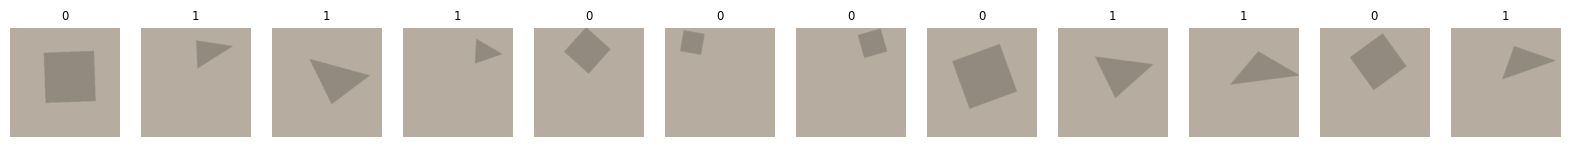

In [3]:
train_dataloader=load_images('RealContent/')
plot_samples()

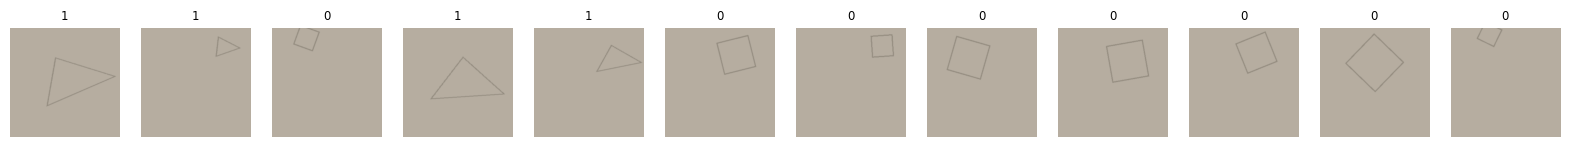

In [4]:
train_dataloader=load_images('OutlineContent/')
plot_samples()

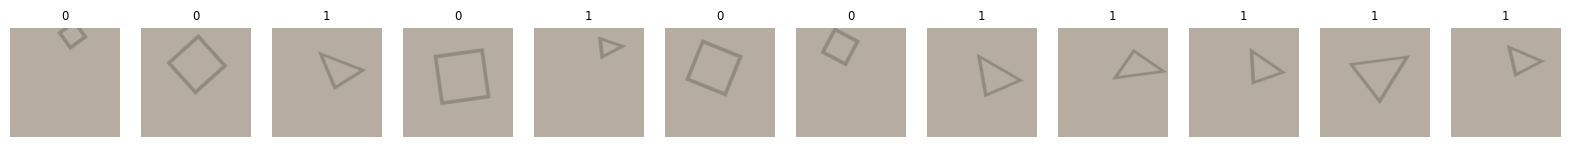

In [5]:
train_dataloader=load_images('OutlineContentThick/')
plot_samples()

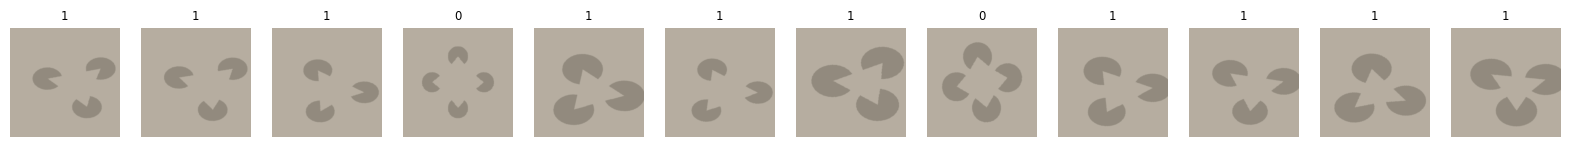

In [6]:
train_dataloader=load_images('Kanizsa/')
plot_samples()

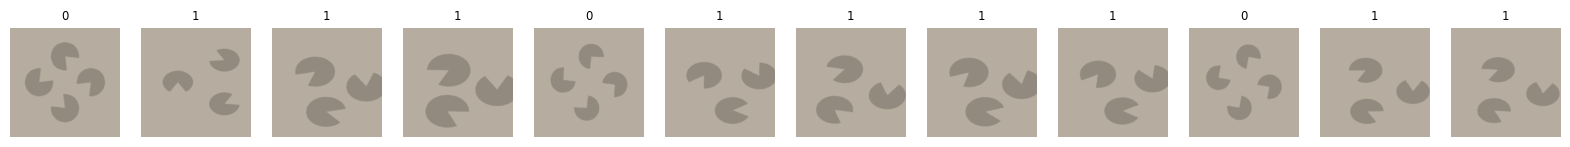

In [7]:
train_dataloader=load_images('NotKanizsa/')
plot_samples()

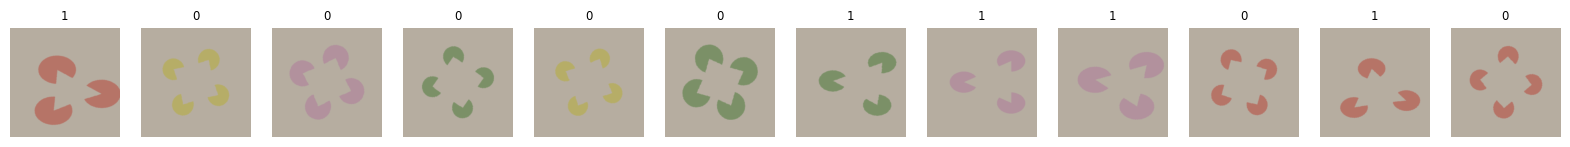

In [8]:
train_dataloader=load_images('KanizsaRed/')
plot_samples()

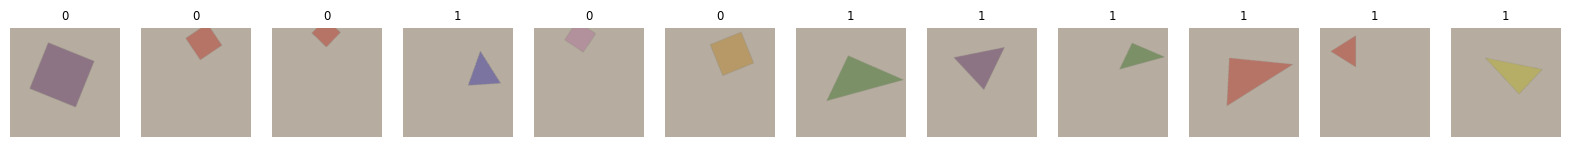

In [9]:
train_dataloader=load_images('RealContentColour/')
plot_samples()

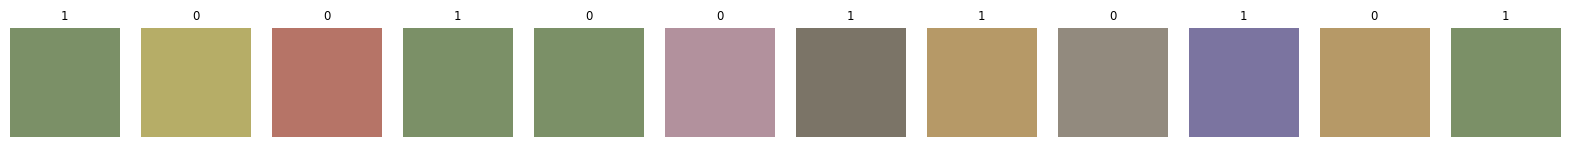

In [10]:
train_dataloader=load_images('Noise')
plot_samples()